### Q1: Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it (code and explanation)

step1- importing data set and cheking missing values

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load the dataset
data = pd.read_csv('dataset.csv')
print(data.describe())

# 1. Check for missing values
print("Missing values per column:\n", data.isnull().sum())



       bill_length_mm  bill_depth_mm  flipper_length_mm   body_mass_g
count      337.000000     342.000000         342.000000    342.000000
mean        43.876855      17.151170         200.915205   4273.976608
std          5.478600       1.974793          14.061714   1119.229602
min         32.100000      13.100000         172.000000   2700.000000
25%         39.200000      15.600000         190.000000   3550.000000
50%         44.100000      17.300000         197.000000   4050.000000
75%         48.500000      18.700000         213.000000   4793.750000
max         59.600000      21.500000         231.000000  15000.000000
Missing values per column:
 species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64


step2-Handling missing values

In [2]:

# 2. Handling missing values

# missing categorical values with the mode (most frequent value) for the column.
# We will fill missing numeric values with the median for that species and sex ,


# Fill missing categorical values (like sex)
data['sex'] = data['sex'].fillna(data['sex'].mode()[0])


# Fill missing numeric values
numeric_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for col in numeric_columns:
    data[col] = data.groupby(['species', 'sex'])[col].transform(lambda x: x.fillna(x.median()))


missing_values = data.isnull().sum()
print("Remaining missing values per column after imputation:\n", missing_values)
print(data.head())

Remaining missing values per column after imputation:
 species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm   
0  Adelie  Torgersen            39.1           18.7              181.0  \
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen            40.6           18.9              192.0   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    male  
1       3800.0  female  
2       3250.0  female  
3       4000.0    male  
4       3450.0  female  


### Q2: What is the average body_mass_g for Gentoo penguins? (code)

In [3]:

average_body_mass_g = data[data['species'] == 'Gentoo']['body_mass_g'].mean()

print(f"The average body_mass_g for Gentoo penguins is: {average_body_mass_g:.2f} g")


The average body_mass_g for Gentoo penguins is: 5136.29 g


### Q3: How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species? Analyze the skewness and kurtosis of each feature for different species. (code and explanation)

step-1 code

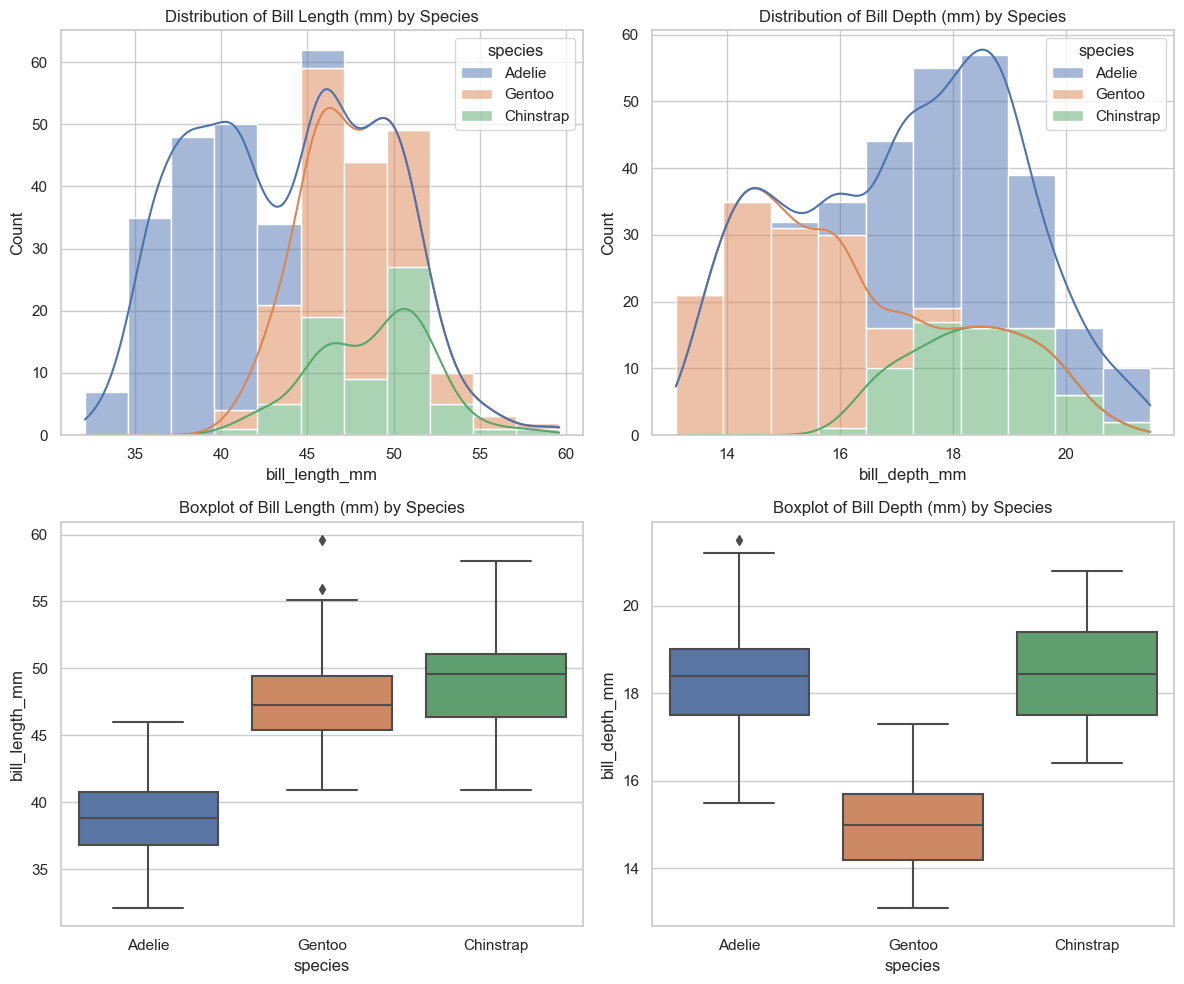

           bill_length_mm  bill_depth_mm  bill_length_mm_kurtosis   
species                                                             
Adelie           0.149965       0.313130                -0.157383  \
Chinstrap       -0.091768       0.006879                 0.043250   
Gentoo           0.674442       0.308629                 1.381408   

           bill_depth_mm_kurtosis  
species                            
Adelie                  -0.052578  
Chinstrap               -0.874796  
Gentoo                  -0.590423  


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the penguin data

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot histograms
sns.histplot(data=data, x='bill_length_mm', hue='species', multiple='stack', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Bill Length (mm) by Species')

sns.histplot(data=data, x='bill_depth_mm', hue='species', multiple='stack', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Bill Depth (mm) by Species')

# Boxplots
sns.boxplot(x='species', y='bill_length_mm', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of Bill Length (mm) by Species')

sns.boxplot(x='species', y='bill_depth_mm', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of Bill Depth (mm) by Species')

plt.tight_layout()
plt.show()

# Calculate skewness and kurtosis
skewness = data.groupby('species')[['bill_length_mm', 'bill_depth_mm']].agg(pd.Series.skew)
kurtosis = data.groupby('species')[['bill_length_mm', 'bill_depth_mm']].agg(pd.Series.kurt)

# Combine skewness and kurtosis into a single DataFrame for easier viewing
stats = pd.concat([skewness, kurtosis.rename(lambda x: x + '_kurtosis', axis=1)], axis=1)
print(stats)


### Q4: Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers. (code and explanation)

In [5]:
import pandas as pd
from IPython.display import display

def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

outliers = {}
for column in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    outliers[column] = detect_outliers_iqr(data[column])


for column in outliers:
    print(f"Number of outliers in {column}: {outliers[column].sum()}")
    if outliers[column].sum() > 0:  # Only print outliers if they exist
        outlier_values = data[data[column].isnull() == False][outliers[column]]
        print(f"Outliers in {column}:\n")
        display(outlier_values)




Number of outliers in bill_length_mm: 0
Number of outliers in bill_depth_mm: 0
Number of outliers in flipper_length_mm: 0
Number of outliers in body_mass_g: 3
Outliers in body_mass_g:



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
73,Adelie,Torgersen,45.8,18.9,197.0,15000.0,male
206,Gentoo,Biscoe,46.5,14.4,217.0,12000.0,female
324,Chinstrap,Dream,51.5,18.7,187.0,10000.0,male


### Q5: Does this dataset contribute to the curse of dimensionality? If yes perform PCA. (code and explanation required)

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select  columns for PCA
numeric_data = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)


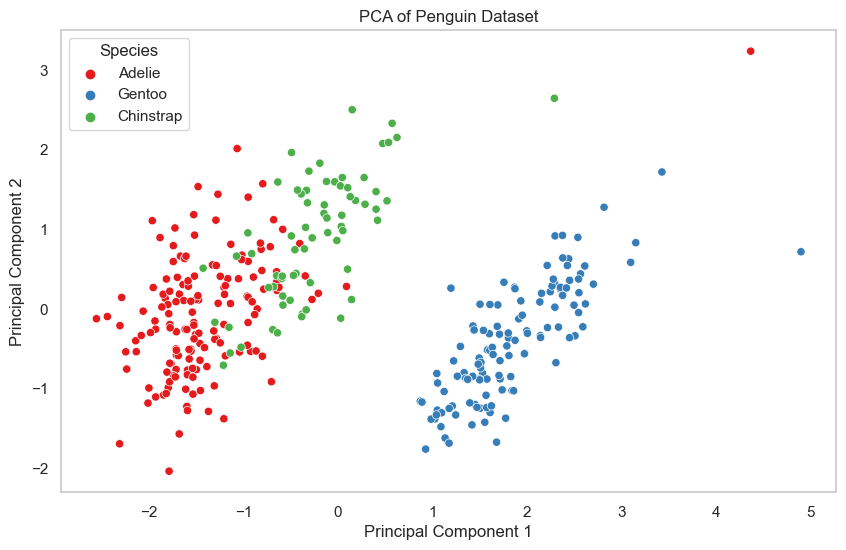

In [7]:
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['species'] = data['species']  # Add species for coloring

# Visualize PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df, palette='Set1')
plt.title('PCA of Penguin Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species')
plt.grid()
plt.show()



### Use bill_length_mm vs bill_depth_mm and plot 7 different graphs to visualize them. (code)

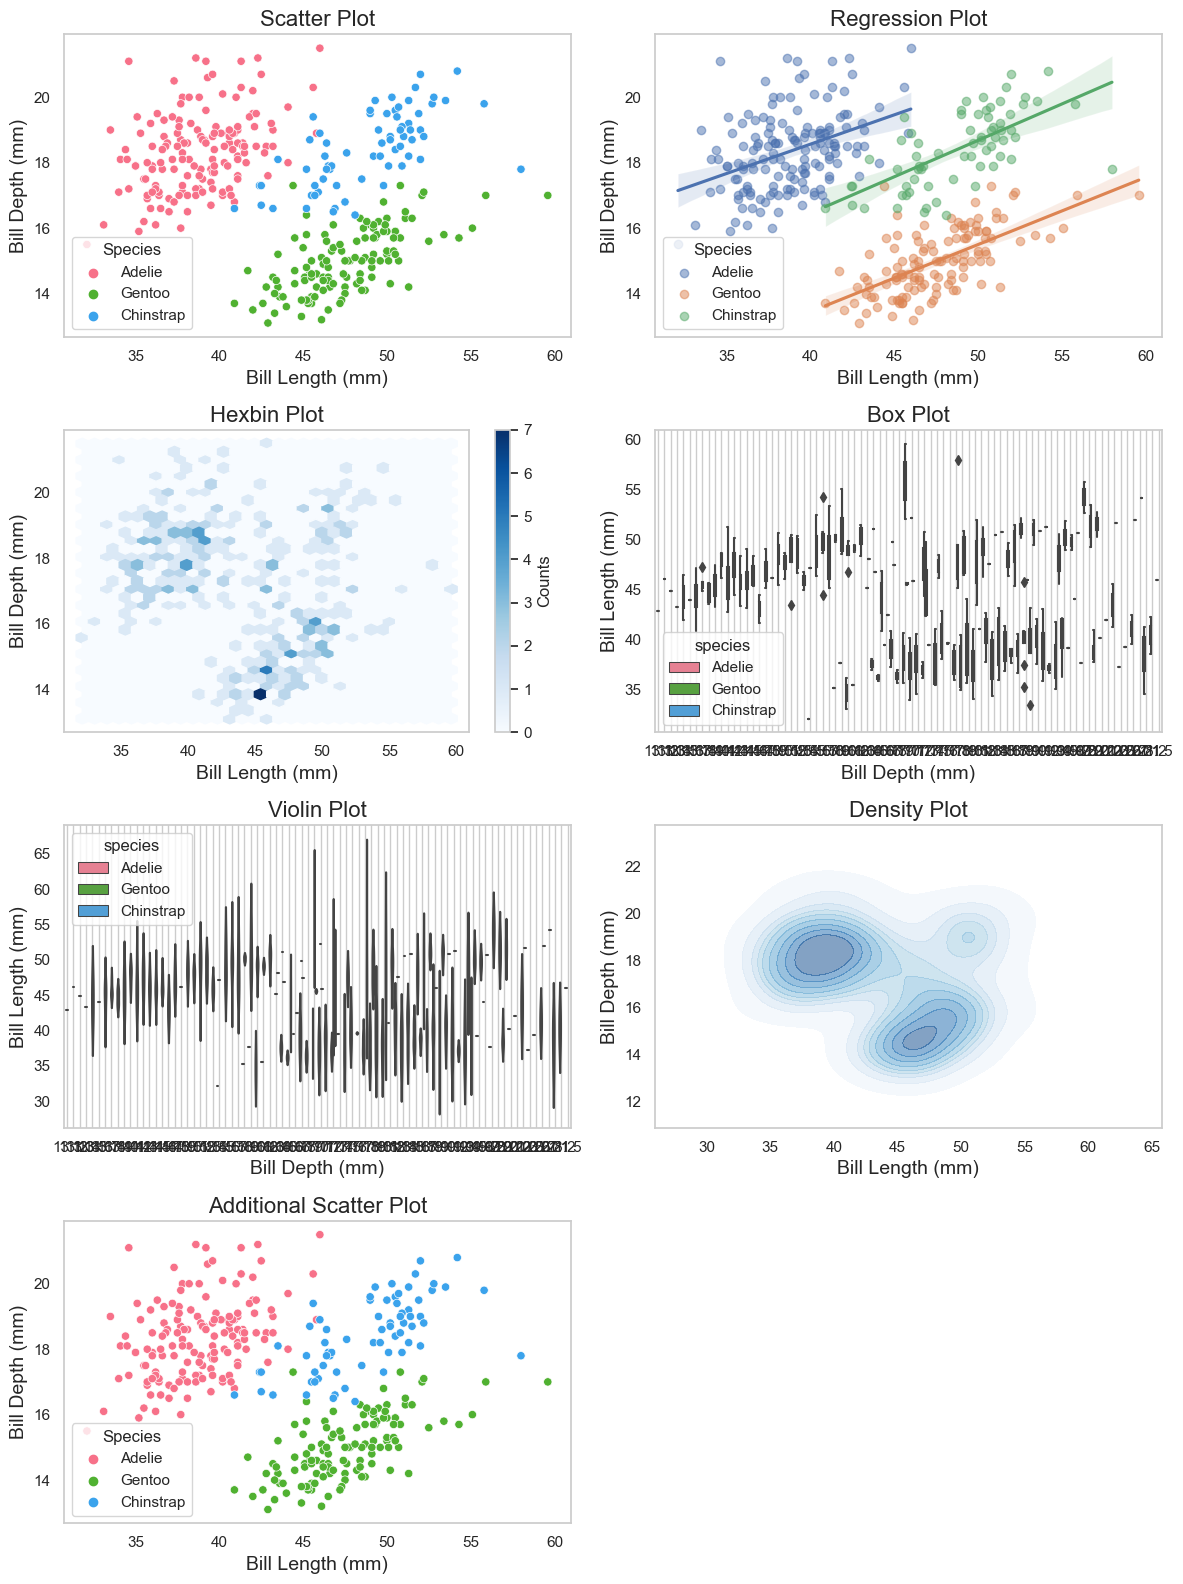

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axs = plt.subplots(4, 2, figsize=(12, 16))
axs = axs.flatten()  # Flatten to easily index

# Set a color palette
palette = sns.color_palette("husl", len(data['species'].unique()))

# 1. Scatter Plot
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=data, ax=axs[0], palette=palette)
axs[0].set_title('Scatter Plot', fontsize=16)
axs[0].set_xlabel('Bill Length (mm)', fontsize=14)
axs[0].set_ylabel('Bill Depth (mm)', fontsize=14)
axs[0].legend(title='Species')
axs[0].grid()

# 2. Regression Plot for each species
for species in data['species'].unique():
    sns.regplot(x='bill_length_mm', y='bill_depth_mm', data=data[data['species'] == species],
                ax=axs[1], label=species, scatter_kws={'alpha':0.5})

axs[1].set_title('Regression Plot', fontsize=16)
axs[1].set_xlabel('Bill Length (mm)', fontsize=14)
axs[1].set_ylabel('Bill Depth (mm)', fontsize=14)
axs[1].legend(title='Species')
axs[1].grid()

# 3. Hexbin Plot
hb = axs[2].hexbin(data['bill_length_mm'], data['bill_depth_mm'], gridsize=30, cmap='Blues')
axs[2].set_title('Hexbin Plot', fontsize=16)
axs[2].set_xlabel('Bill Length (mm)', fontsize=14)
axs[2].set_ylabel('Bill Depth (mm)', fontsize=14)
plt.colorbar(hb, ax=axs[2], label='Counts')
axs[2].grid()

# 4. Box Plot
sns.boxplot(x='bill_depth_mm', y='bill_length_mm', hue='species', data=data, ax=axs[3], palette=palette)
axs[3].set_title('Box Plot', fontsize=16)
axs[3].set_xlabel('Bill Depth (mm)', fontsize=14)
axs[3].set_ylabel('Bill Length (mm)', fontsize=14)
axs[3].grid()

# 5. Violin Plot
sns.violinplot(x='bill_depth_mm', y='bill_length_mm', hue='species', data=data, ax=axs[4], palette=palette, inner='quartile')
axs[4].set_title('Violin Plot', fontsize=16)
axs[4].set_xlabel('Bill Depth (mm)', fontsize=14)
axs[4].set_ylabel('Bill Length (mm)', fontsize=14)
axs[4].grid()

# 6. Density Plot
sns.kdeplot(data=data, x='bill_length_mm', y='bill_depth_mm', fill=True, ax=axs[5], cmap='Blues', alpha=0.5)
axs[5].set_title('Density Plot', fontsize=16)
axs[5].set_xlabel('Bill Length (mm)', fontsize=14)
axs[5].set_ylabel('Bill Depth (mm)', fontsize=14)
axs[5].grid()

# 7. Additional Scatter Plot
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=data, ax=axs[6], palette=palette)
axs[6].set_title('Additional Scatter Plot', fontsize=16)
axs[6].set_xlabel('Bill Length (mm)', fontsize=14)
axs[6].set_ylabel('Bill Depth (mm)', fontsize=14)
axs[6].legend(title='Species')
axs[6].grid()

# Remove the unused subplot
fig.delaxes(axs[7])

# Adjust layout
plt.tight_layout()
plt.show()


###  Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island? (code)

In [9]:
import pandas as pd


# Group by species and island, then find the maximum flipper_length_mm
max_flippers = data.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()

# Find the species with the longest flippers on each island
longest_flippers = max_flippers.loc[max_flippers.groupby('island')['flipper_length_mm'].idxmax()]

# Display the results
print(longest_flippers)


     species     island  flipper_length_mm
4     Gentoo     Biscoe              231.0
3  Chinstrap      Dream              212.0
2     Adelie  Torgersen              210.0


### Perform z-score normalization on this dataset. (code)

In [10]:
import pandas as pd


numeric_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Calculate mean and standard deviation for each colum
means = data[numeric_columns].mean()
stds = data[numeric_columns].std()

# Perform Z-score normalization
data[numeric_columns] = (data[numeric_columns] - means) / stds

# Display the normalized data
display(data.head())

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.886150,0.784635,-1.417671,-0.471077,male
1,Adelie,Torgersen,-0.812767,0.125689,-1.062324,-0.426349,female
2,Adelie,Torgersen,-0.665999,0.429818,-0.422698,-0.918359,female
3,Adelie,Torgersen,-0.610962,0.886012,-0.635907,-0.247436,male
4,Adelie,Torgersen,-1.326452,1.088764,-0.564837,-0.739446,female
